# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [30]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [31]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [32]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [42, 228, 354]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10850,7555,14961,188,6899,46
1,1869,577,572,950,4762,203
2,14039,7393,2548,6386,1333,2341


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

Frankly I found this question pretty challenging, but I made my best guesses and found three examples that were fairly different in their distributions. 

Sample 1: This customer is making use of an average amount of fresh food (a bit above 50th percentile) and an above average amount of Milk (above 75the percentile), while the frozen and delicatessen options are very limited, not too far from the minimum in the data set.
Where this customer stands out compared to the statistical profile of the average customer is in the Grocery and Detergents_Paper categories, where it's buying double the average for Grocery (above 75th percentile) and almost triple the average for Detergents_Paper (also above 75th percentile).
This seems like an odd mix to me. While it stands out in categories you might expect for a grocery store, it would be odd for a grocery store to have so little frozen and delicatessen products. And it wouldn't make much sense for a restaurant type business to have this mix.
Maybe this is a wholesale retailer that happens to focus on these sorts of products?

Sample 2: This customer is small, generally, with all of its spending coming in well below the average for the whole dataset with one exception: they spend above the average on the Detergents_Paper category (above the 75th percentile). A business so heavily tilted to that category might be a hotel, where cleaning products especially are going to be needed in bulk while the rest of these products would only be needed in limited amount to supply room service or breakfast. 

Sample 3: This customer is above average in fresh food (above 50th percentile), milk (75th percentile), frozen food (above 75th percentile) and Delicatessen (above 75th percentile). The other categories are below the average. This customer seems very likely to be selling food directly to customers, it is probably a cafe or restaurant.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [33]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Milk', axis=1)
feature = data['Milk']

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data, 
                                    feature, 
                                    test_size = 0.25, 
                                    random_state=2)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
prediction = regressor.predict(X_test)
train_score = regressor.score(X_train, y_train)
score = regressor.score(X_test, y_test)
print prediction
print train_score
print score

[  2305.13609467   2305.13609467  12107.42307692   5987.84693878
   2305.13609467   2305.13609467   5987.84693878   2305.13609467
   5987.84693878   2305.13609467   2305.13609467  12107.42307692
  12107.42307692   5987.84693878   2305.13609467   2305.13609467
   2305.13609467   2305.13609467   5987.84693878  12107.42307692
   2305.13609467   5987.84693878   5987.84693878   5987.84693878
  12107.42307692   5987.84693878  12107.42307692   2305.13609467
   5987.84693878   2305.13609467   5987.84693878   5987.84693878
   2305.13609467   5987.84693878   5987.84693878  12107.42307692
   5987.84693878   2305.13609467   5987.84693878   5987.84693878
   2305.13609467   2305.13609467   2305.13609467   4980.           5987.84693878
   5987.84693878   5987.84693878   2305.13609467   2305.13609467
   5987.84693878   2305.13609467   5987.84693878   2305.13609467
   5987.84693878   2305.13609467   2305.13609467   2305.13609467
   5987.84693878   5987.84693878  12107.42307692   2305.13609467
   5987.8

In [62]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

I chose to attempt to predict the customers' expenditure on milk given their level of expenditure on the other product categories. The Decision Tree Regressor had an accuracy score of 0.47 on the test data. That's middle of the pack in terms of predictive performance compared to the other categories, which I also tested. 
The frozen category stuck out as being totally unpredictable given knowledge of the expenditures in all other categories--it proved to have a negative R^2, meaning the model was even worse than simply using a horizontal line to fit the data. 
Given my chosen category of milk was middle of the pack, it appears it's going to be a relatively less important feature as compared to the frozen category.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

C:\Users\josha\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


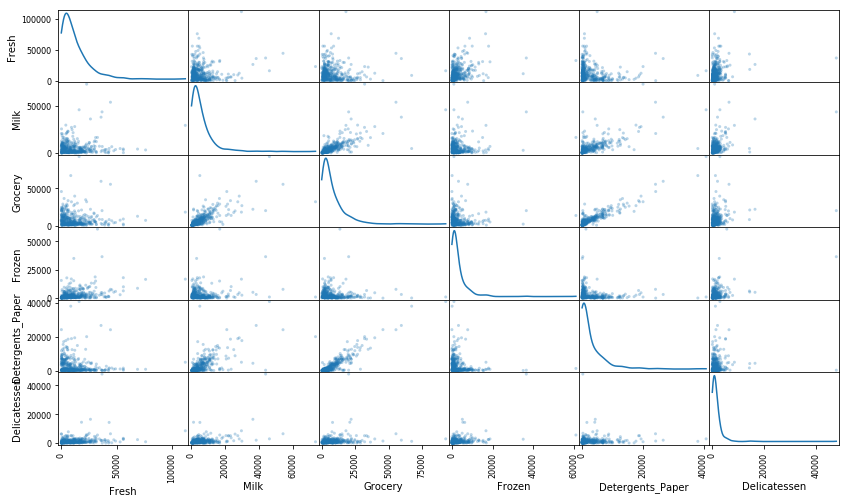

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

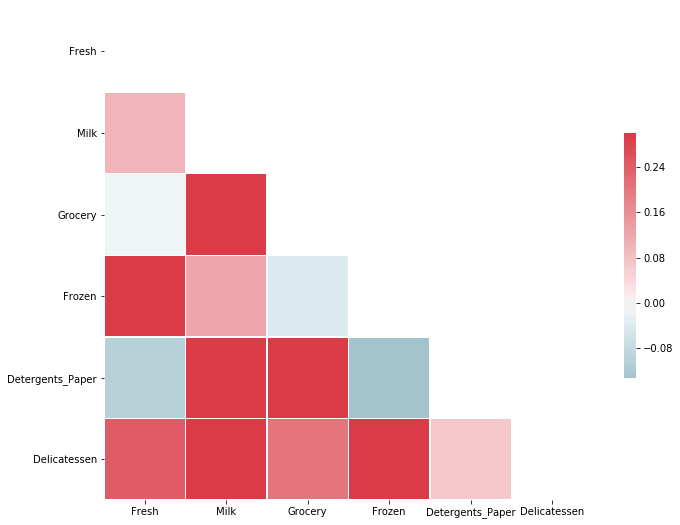

In [6]:
"""
I was struggling to figure out how to create the heatmap here... I ended up finding some example code via a link in the
discussion forums... 
so I'm just noting here that I got most of this code from this link: http://seaborn.pydata.org/examples/many_pairwise_correlations.html

"""

import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Answer:**

The relationships in these data sets do not appear to be symmetrical as you would see in a classic bell curve distribution... they are heavily skewed right with long tails.
A number of the correlations between pairs of features are very tightly packed near zero... notably the correlation between Delicatessan and the other features exhibits this pattern.
A few of the pairs have more variation than others... whereas Delicatessan corellations are all tightly packed toward zero, the detergents_paper feature has a much more varied distribution.
All features had a few major outliers in their correlations.
A few of the feature pairs look like they have nice, linear kinda of correlations... Grocery and Detergents_Paper are notable in that regard, as are Grocery and Milk, as well as Detergents_Paper and Milk
My chosen feature, Milk, seemed to fair about as expected from my previous analysis--while it had a nice correlation with several features, none of the correlations were extremely strong, so it proved to be middle of the pack in terms of usefulness.



## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\Users\josha\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


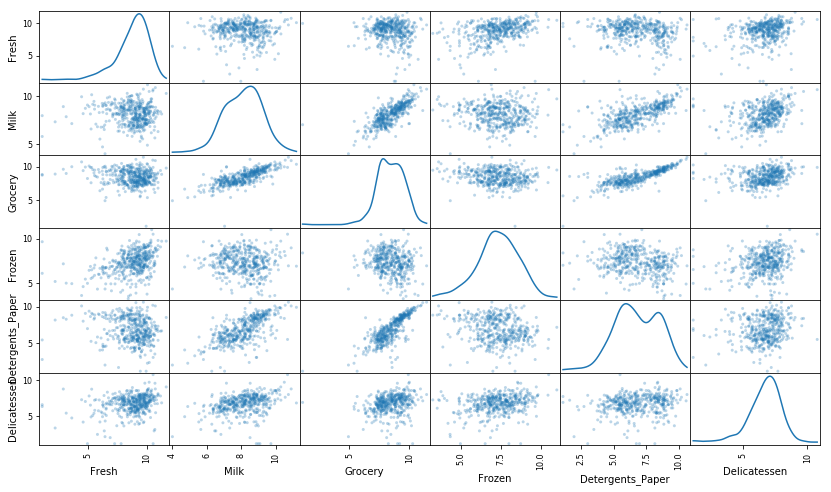

In [11]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [12]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.291920,8.929965,9.613202,5.236442,8.839132,3.828641
1,7.533159,6.357842,6.349139,6.856462,8.468423,5.313206
2,9.549594,8.908289,7.843064,8.761863,7.195187,7.758333


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    IQR = Q3 - Q1
    step = 1.5*IQR
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

I found 5 data points that were outliers for at least two features. Four of those outliers appeared in two features, one of the outliers appeared in 3 features. The five I found were:
-65 (fresh and milk)
-75 (grocery and detergents/paper)
-66, 128 (fresh and delicatessen)
-154 (milk, grocery, and delicatessen)

I think it would be wise to remove these outliers that appear more than once... they will end up having too great an effect on the overall analysis, especially because k-means clustering is sensitive to outliers.
This is because k-means clustering is minimizing the sum of squared errors, so a very large outlier will even have greater effect as a result of being squared(transforming exponentially rather than linearly).

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

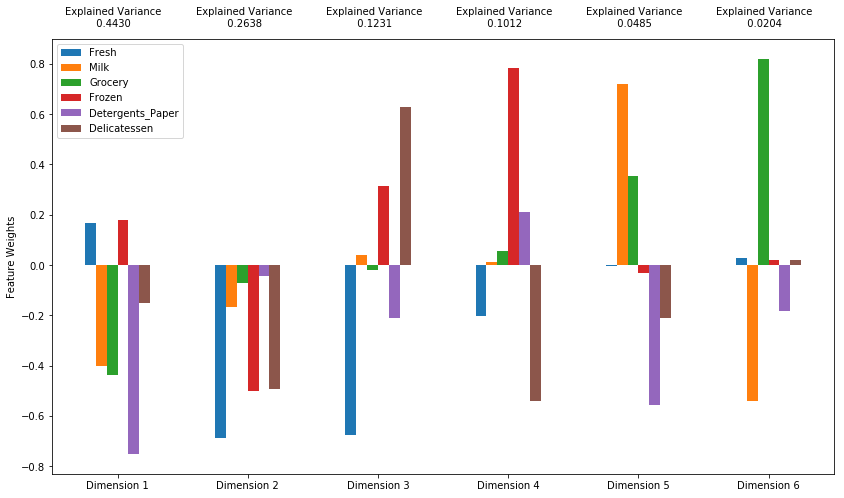

In [14]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca= PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

- The PCA analysis showed that the first principal component accounted for about 44% of the variance in the data and the second principal component accounted for about 27% of the variance in the data. So a total of about 71% of the variance of the data is accounted for by the top two principal components.
- Adding the next two principal components (therefore totaling the top four) we can now account for about 92% of the variance in the data.
- The first two principle components give us a lot of information about the negative variance explained in the data, so: 
    1. As the first PCA increases we would predict grocery, milk, and especially detergents_paper sales to decrease quite a bit. The strength of the relationship to PCA1 is weaker for the other three categories.
    2. As the second PCA increases we expect to see much lower sales numbers in the Fresh, Frozen, and Delicatessen categories, while the other three categories have weaker relationshps with this PCA, all being slightly negative.
    3. The third PCA shows a strong negative correlation with sales in the Fresh category and a strong positive correlation with sales in the Delicatessen category. It also shows a moderately positive relationship in the Frozen category and a moderately negative relationship with teh Detergents_Paper category.
    4. The fourth PCA shows a very strong positive reltionship with sales in the Frozen category, a strong negative relationship in the Delicatessen category, a moderate negative relationship in the Fresh category and a moderate positive relationship in the Detergents_Paper category.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [15]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.2146,1.7988,-3.2371,0.3088,0.5148,0.0568
1,0.2982,2.1375,-0.5634,0.8431,-2.6479,-1.1532
2,-0.1126,-1.8858,0.5508,0.4506,-0.1517,-0.9266


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [34]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca= PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.2146,1.7988
1,0.2982,2.1375
2,-0.1126,-1.8858


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

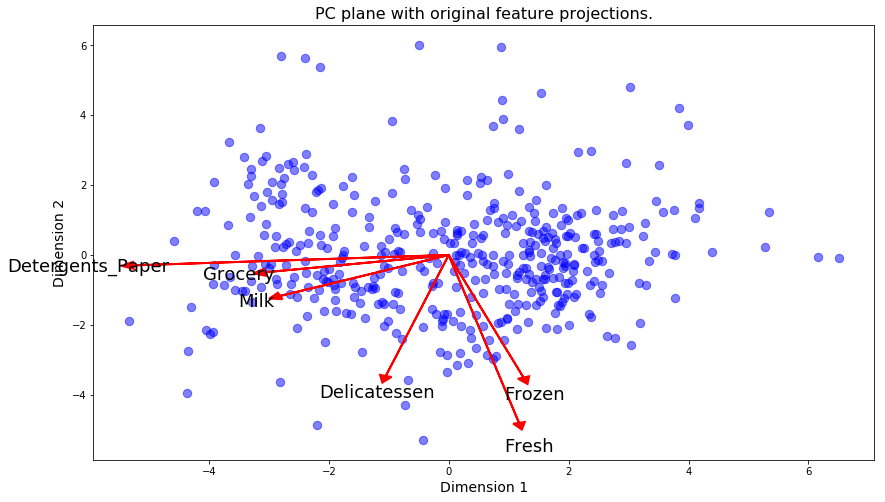

In [18]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

(For this question I looked through a few sources to get a better handle on the differences between K-Means and Gaussian Mixture clustering. The source which most informed my answer is this Quora question: https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian)

- Based on my understanding of these methods, the primary advantage of K-Means clustering is that it assumes sharp distinctions between clusters. It is saying that we are identifying groups of data points that are different enough from eachother that we can put them in different qualitative bins. So in our example, this may look like trying to sort our data into types of business: restaurants, groceries, small convenience shops, etc. We want to try to sort them along these strict, distinct categories as best we can, and the K-Means method is more designed to do that kind of sorting.
- Gaussian Mixture is best suited for cases where the lines between clusters may be blurrier, and you're not making a clear jump from one qualitative category to another when you jump between clusters. This method can handle more complex and varied data, but it can also be harder to interpret because it's less sharply defined than K-Means clustering.
- I'm torn on what to use for this case. The observations in our data seem a bit scattered... it's not obvious to me that there are very clear distinctions between the groups of similar observations, so that we could say these are almost certainly restaurants, these are almost certainly department stores, etc.
    But it also seems to me that for this problem, we would want to be trying to make clear delineations in this way, to better understand our customer base. So I'm inclined to use K-Means clustering here.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [24]:
# TODO: Apply your clustering algorithm of choice to the reduced data
from sklearn.cluster import KMeans
clusterer = KMeans()
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples) 

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score
score = silhouette_score(reduced_data, preds)
print score

0.364054974884


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
    
* Of these, which number of clusters has the best silhouette score?

**Answer:**

My first result came from leaving the cluster number (n_clusters parameter) at its default of eight. That produced a silhouette score of about 0.359.
I found the best silhouette score actually came with two clusters, which produced a score of about 0.419. Using three clusters gave me a score around 0.394... as I added four or more clusters, I found the score converging toward roughly 0.35.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

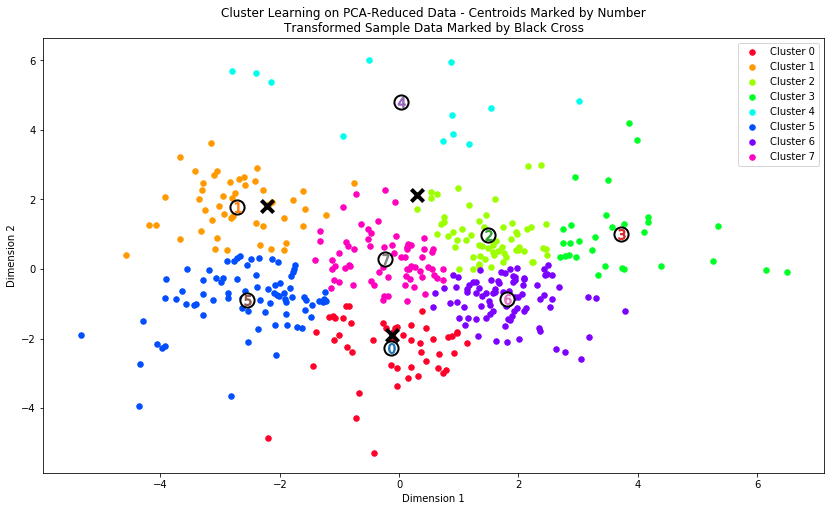

In [25]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

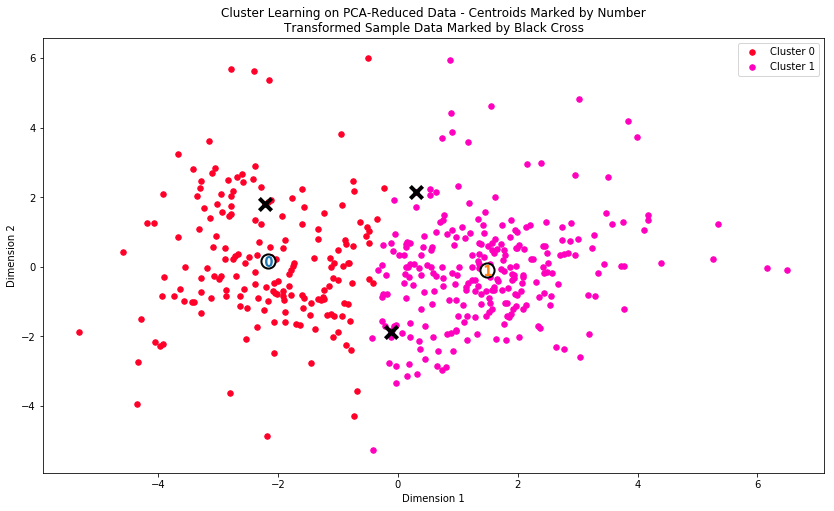

In [26]:
#Using the number of clusters that got me the best silhouette score
clusterer = KMeans(n_clusters= 2 )
clusterer.fit(reduced_data)

preds = clusterer.predict(reduced_data)

centers = clusterer.cluster_centers_

sample_preds = clusterer.predict(pca_samples)

vs.cluster_results(reduced_data, preds, centers, pca_samples)



### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [27]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

It doesn't seem ideal that I ended up with only two customer segments, but that is what the silhouette score recommended.
Looking at the major differences between the two segments, I would think customers fitting Cluster 0 are likely to be grocery store type establishments... they have a large number of grocery items, a long with a good mix of other items, and in general they buy much more of everything (except fresh and frozen foods) than customers in Cluster 1.
So my guess would be the major breakdown here is between customers more in the grocery/retail category and customers more in the retaurant category. The characteristic customer in the latter spends most its money on fresh and frozen food, which would make sense if they're needing a lot of ingredients to make meals for customers.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [28]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**

I feel my eyeball assement of these predictions suggests the results are somewhat mixed compared to what I would have expected. I don't see with this problem that there is a very clearly delineation across the samples between two types of customer... there seems to be a lot of blurriness.

The clearest reason that I could see that it makes sense for Sample point 0 to be in category 0 is that this sample customer spent a large amount on groceries, way more than the other two samples, and that is characteristic of the customers in Cluster 0, which I identified as looking more like grocery stores.

Sample point 2 looks a bit more restaurant-like to me as compared to Sample point 1, both of which ended up in Cluster 1 according to our predictions, which I identified as the cluster looking more like restaurants.
Sample point 1 stands out in this group for simply being smaller than the other two... it also has a more even distribution across all categories. Maybe this sample is more like a small convenience store?
Sample point 2 is heavy on fresh and frozen foods, which seem to be most characteristic of Cluster 1, which I thought suggested these businesses are focused on making and selling food to customers, so they're likely in the restaurant category.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

My inclination would be to assume that restaurants would be better off having more deliveries each week, so they wouldn't like the drop from 5 to 3, whereas grocery stores might benefit from it.

A restaurant is typically going to have a lot of "turnover" in terms of food, and it's probably going to be difficult to predict how quickly various ingredients might run out and need to be replenished. So getting only three deliveries a week could place them at a greater risk of running out of ingredients and being short until the next delivery, which is a real problem for the customer experience at a restaurant. People aren't going to put up with you frequently not having the menu items they want available, whereas I think a customer in a grocery store is not going to be so upset if a store happens to be out of the item they're looking for. That's something you would occasionally expect as a customer at a grocery store.

Grocery stores, on the other hand, might even benefit from fewer shipments per week, because it's necessary to have extra staff on hand when shipments come in and stocking has to be done. It may be more efficient to consolidate that work to three days a week rather than five, thus saving the store on labor costs.

So, given these assumptions I've made, we would predict that customers in Segment 0 would be more likely to respond positively to the change, whereas cutomers in Segment 1 would be more likely to respond negatively. Testing this and getting back actual results might help us update our model of what kinds of customers we have.

In order to test this, I would begin rolling out the new delivery schedule to, let's say, 20% of customers in each cluster, and use the results from that test to determine if our hypothesis was accurate (that customers more similar to our "restaurant" cluster would prefer the 5-day schedule as compared to the "grocery" cluster, and vice versa for the 3-day schedule).

This seems like a healthy enough sample to know whether our hypothesis was totally off, or whether we're on to something. If this test phase returns the results we expect, then we could continue to phase in more customers based on our prediction of which schedule they would like, and continue to update the assumption based on the data we get back.

If the response we get from a 20% sample is totally uncorrelated to the prediction from our assumption, I would suspect that's reason enough to start looking for a different way of clustering/classifying our customer set.

I don't see how a feedback mechanism as discussed in the Quora article here would arise, as we shouldn't expect our customers' behaviors to interact with one another (https://www.quora.com/When-should-A-B-testing-not-be-trusted-to-make-decisions/answer/Edwin-Chen-1).

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

We would want to feed the new customers into the model in the same way we did with our sample data, and the target variable would which of our Customer Segments the new customer is predicted to fall into.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

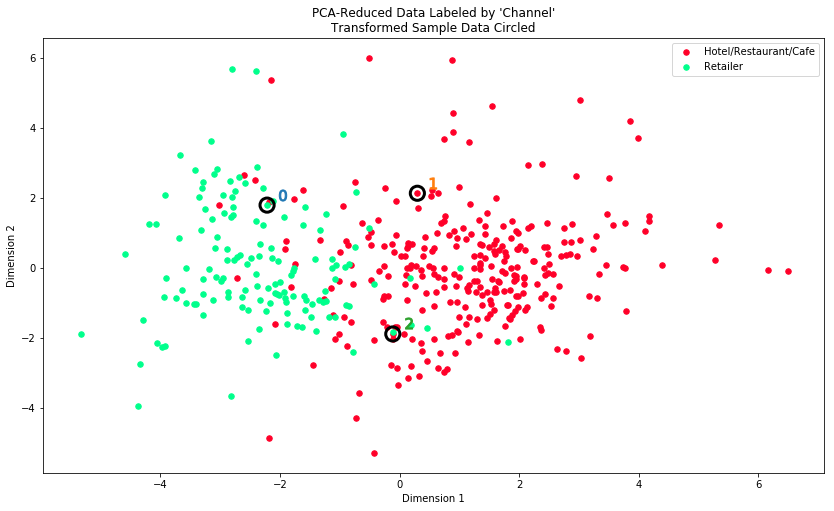

In [29]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

The scatterplot for this data, and the conclusions I draw from it, actually looks to fit pretty nicely with the way my method plus intuition broke things down.
The term "retailers" is really what I had in mind when I was talking about grocery store, while hotel/restaurant/cafe is a better fit with what I generally guessed as "restaurant" or similar type establishment. I didn't think to consider hotels as one of the likely options.
My clustering split the data in a pretty similar way to what's shown here. There are definitely some differences, but the general look of the two scatter plots is similar.
It doesn't look to me that this clustering is specific and granular enough to say we could easily identify one cluster as purely one type. Of course there are going to be those differences in customers, but it doesn't look to me like our data can cluster what we know that neatly. 
I do think the way I defined the customer segments is pretty close to the way it was done here.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.